In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
#setting hyperparameters
M=1200  #number of examples
EPOCHS=8000
num_features=11 #length of feature vector
learning_rate=0.01
W=np.random.randn(num_features,1)
b=np.random.randn(1,1)

In [3]:
x_train=np.random.randn(num_features,1200)
W_act=np.random.randn(num_features,1)
b_act=np.random.randn(1,1)
y_train=np.dot(W_act.T,x_train)+b_act

In [4]:
def compute_loss(y, y_pred):
    loss = 1 / 2 * np.mean((y_pred - y)**2)
    return loss

In [5]:
def derivative(y_true,y_pred):
    signum=np.sign(y_pred-y_true)
    derivative=np.multiply(signum,3*(y_pred-y_true)**2)
    return derivative

In [6]:
losses=[]
for i in range(0,EPOCHS):
    preds=np.dot(W.T,x_train)+b
    dZ=derivative(y_train,preds)
    #print(y_train.shape)
    #print(x_train.shape)
    W_grad=((np.dot(x_train,dZ.T)))/M
    #print(W_grad)
    b_grad=(1/M)*(np.sum(dZ))
   # print(b_grad)
    W=W-learning_rate*W_grad
    b=b-learning_rate*b_grad
    loss=compute_loss(y_train,preds)
    losses.append(loss)
    

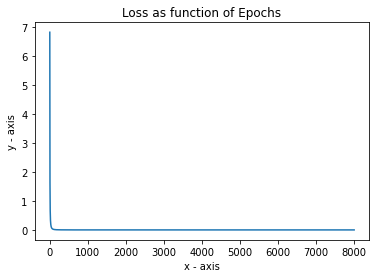

In [7]:
x=lst = list(range(1,EPOCHS+1))
y=losses
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
  
# giving a title to my graph
plt.title('Loss as function of Epochs')
  
# function to show the plot
plt.show()

In [8]:
print(losses[-1])

4.058967481537171e-06


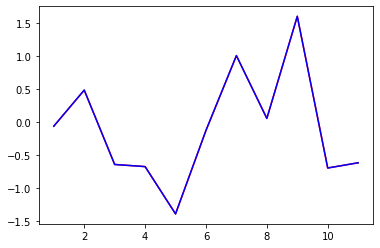

In [9]:
#A plot of actual weights against trainable weights. Actual weights are in  red and trainable weights in blue.
x=list(range(1,11+1))
plt.plot(x, W_act.tolist(), 'r') 
plt.plot(x, W.tolist(), 'b') 
plt.show()

In [10]:
# This loss is better than the (b) loss as it accounts for the distance between the true and predicted values. When they are
# very far, it descends quickly and slows the descent closer to the objective. This results in slightly better results
# compared to the (b) loss. The problem of exploding and vanishing gradients first appears here. The gradient can die off
# close to the objective as there is an exponent of two associated withthe difference. Exploding gradients present a bigger
# problem. If the loss is too big, then after being multiplied by the learning rate it has the potential to cause an
# over-correction. This can lead to the loss in the second iteration being greater than before. This is because of the cube
# in the loss.